# Michael Schor's project workbook

## Extract data
____________________________________________________________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_tb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_tr = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_tc = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df_ta = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_tp = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df_nb = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

## Looking at the data
__________________
We need to know what the data sets are before manipulating them


In [8]:
df_tb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df_tr.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
df_tc.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [6]:
df_ta.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [9]:
df_tp.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
df_nb.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


# First Impressions
___________________
I'm mostly interested in the ratings table as I've noticed that there are ratings that don't have many votes at all and it's possible that those ratings are skewing the dataset

In [12]:
#taking a larger look at the data
df_tr

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
#combining it with basics so we can see the title along with the rating and votes
df_combined = df_tb.join(df_tr, how='inner', lsuffix='_tb')
df_combined

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...,...,...,...
73851,tt4206656,MarchFourth Marching Band in China,MarchFourth Marching Band in China,2014,66.0,"Documentary,Music",tt9805820,8.1,25
73852,tt4206658,El Bumbún,El Bumbún,2014,85.0,Drama,tt9844256,7.5,24
73853,tt4206724,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,2014,53.0,"Documentary,History,News",tt9851050,4.7,14
73854,tt4207014,Amante de lo ajeno,Amante de lo ajeno,2012,99.0,Drama,tt9886934,7.0,5


# Visualizing the situation
_____________________
Let's see what happens when we compare the rating to the number of votes

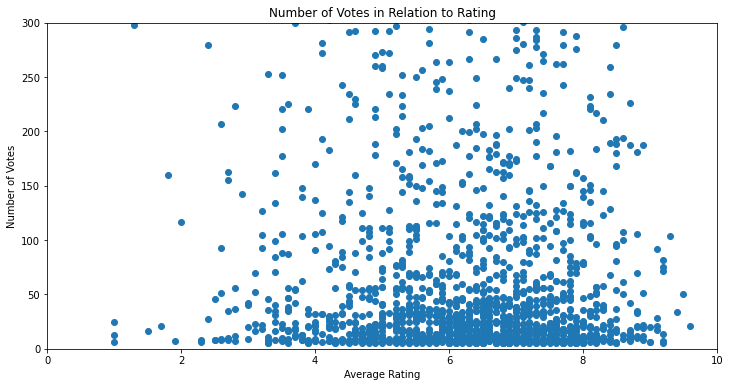

In [17]:
x = df_combined['numvotes'].sample(2000)
y = df_combined['averagerating'].sample(2000)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Votes")

ax.set_title("Number of Votes in Relation to Rating")

ax.scatter(y,x)

Unfortunately we can't tell much about what's going on, it seems like there's a lot of noise happening since there's a ton of data points that don't have a lot of votes. Let's pick an arbitrary number like 100 votes necessary and see how it affects some other comparisons

In [23]:
dropped_df = df_combined[df_combined['numvotes'] >100]
dropped_df

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,tt1069246,6.2,326
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt1094666,7.0,1613
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt1130982,6.4,571
...,...,...,...,...,...,...,...,...,...
73828,tt4205828,Progetto Hebi,Progetto Hebi,2014,57.0,"Documentary,Drama",tt9471952,7.1,338
73831,tt4205864,Abducted by Aliens: UFO Encounters of the 4th ...,Abducted by Aliens: UFO Encounters of the 4th ...,2014,60.0,Documentary,tt9558612,3.7,4057
73832,tt4205866,Three,Three,2015,NaN,Drama,tt9575726,7.7,161
73844,tt4206334,"Gonna Sip That Sip, Hit That Dip: The Emerging...","Gonna Sip That Sip, Hit That Dip: The Emerging...",2015,13.0,"Documentary,Music",tt9668598,5.5,317


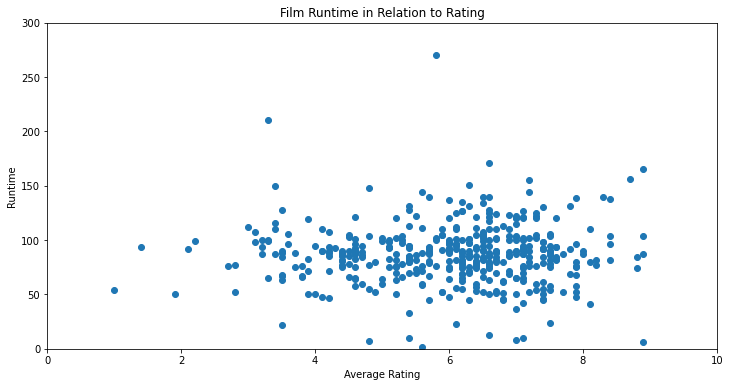

In [26]:
x = dropped_df['runtime_minutes'].sample(500)
y = dropped_df['averagerating'].sample(500)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime")

ax.set_title("Film Runtime in Relation to Rating")

ax.scatter(y,x)

We can see there is a slight positive relationship to rating with runtime, let's check it out with the dataset we didn't clean

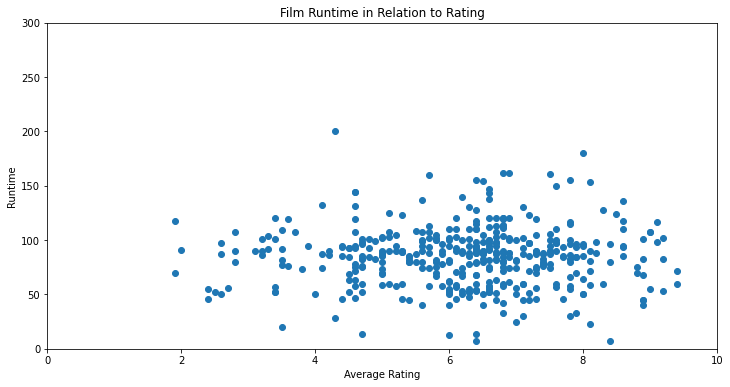

In [27]:
x = df_combined['runtime_minutes'].sample(500)
y = df_combined['averagerating'].sample(500)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime")

ax.set_title("Film Runtime in Relation to Rating")

ax.scatter(y,x)

Here we can't tell anything but this is important that we did need to clean it

In [31]:
dropped_df.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.033526,-0.002393,0.013855
runtime_minutes,0.033526,1.000000,0.001400,0.004530
averagerating,-0.002393,0.001400,1.000000,0.137307
numvotes,0.013855,0.004530,0.137307,1.000000


In [33]:
df_combined.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.017007,-0.003270,0.009165
runtime_minutes,0.017007,1.000000,0.005988,0.000846
averagerating,-0.003270,0.005988,1.000000,0.044478
numvotes,0.009165,0.000846,0.044478,1.000000


We improved the correlation between the different columns by getting rid of excess noise